# Digital Image Processing — Student Assignment Notebook

**Spring 2026**  
**Topic:** Image I/O, grayscale/binary, cropping (ROI), color spaces, and basic arithmetic operations

Fill in the fields below and complete **all TODO cells**.

**Student name:** Mirkomol Mirjalolov  
**Student ID:** 230696 
**Date:** 2026-02-06


## 0) Environment check

Run the next cell. If you see import errors, install the missing packages (e.g., `pip install opencv-python matplotlib scikit-image`).

In [4]:
# Imports (run once)
import os
import numpy as np
import matplotlib.pyplot as plt

import cv2

from skimage import data  # provides sample images (offline)

print("OpenCV:", cv2.__version__)


OpenCV: 4.13.0


## Helper functions (provided)

Use these helpers for consistent display and safe arithmetic on `uint8` images.

In [5]:
def to_rgb(img_bgr_or_rgb):
    """Ensure image is RGB uint8."""
    if img_bgr_or_rgb is None:
        raise ValueError("Image is None. Check the path or loading step.")
    img = img_bgr_or_rgb
    if img.ndim == 2:
        return img
    # If it came from cv2.imread it's BGR; if from skimage it's RGB.
    # We detect by heuristic: assume cv2 format if loaded via cv2.imread.
    return img

def load_image(path=None):
    """Load an RGB image. If path is missing, fall back to a built-in sample."""
    if path and os.path.exists(path):
        bgr = cv2.imread(path, cv2.IMREAD_COLOR)
        if bgr is None:
            raise ValueError(f"Failed to read: {path}")
        rgb = cv2.cvtColor(bgr, cv2.COLOR_BGR2RGB)
        return rgb
    # offline sample (RGB)
    return data.astronaut()

def show_side_by_side(img1, img2, title1="Image 1", title2="Image 2", cmap1=None, cmap2=None):
    plt.figure(figsize=(10,4))
    plt.subplot(1,2,1); plt.imshow(img1, cmap=cmap1); plt.title(title1); plt.axis('off')
    plt.subplot(1,2,2); plt.imshow(img2, cmap=cmap2); plt.title(title2); plt.axis('off')
    plt.axis('off')
    plt.show()

def clip_uint8(x):
    """Clip and convert to uint8."""
    return np.clip(x, 0, 255).astype(np.uint8)


## 1) Load an image (you choose)

Preferred: place an image file (e.g., `fruit basket.jpg`) in the same folder as this notebook and set `IMAGE_PATH`.

If you leave `IMAGE_PATH=None`, the notebook will use a built-in sample image.

Image shape (H, W, C): (859, 840, 3) | dtype: uint8


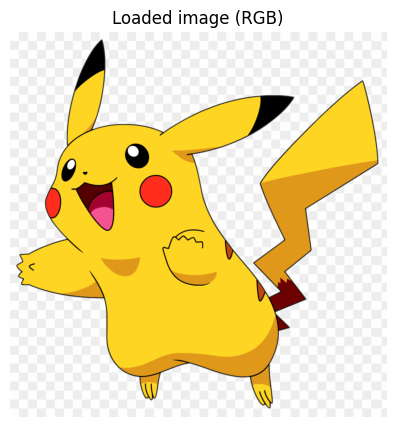

In [6]:
# TODO: set this to your image file name if you have one, e.g. "fruit basket.jpg"
IMAGE_PATH = "/home/kamolk/Pictures/cartoon-11551057788bw864qbup7.png"  # or "fruit basket.jpg"

img = load_image("/home/kamolk/Pictures/cartoon-11551057788bw864qbup7.png")
print("Image shape (H, W, C):", img.shape, "| dtype:", img.dtype)

plt.figure(figsize=(5,5))
plt.imshow(img)
plt.title("Loaded image (RGB)")
plt.axis("off")
plt.show()


## 2) Image I/O basics

### Task 2.1 — Inspect pixels
1. Print the pixel value at `(row=0, col=0)` and at the image center.
2. Explain what the 3 numbers represent in an RGB image.

Write your answer under **Task 2.1 (Answer)**.

In [7]:
# TODO (Task 2.1): print two pixel values
h, w = img.shape[:2]
print("Top-left pixel:", img[0, 0])
print("Center pixel:", img[h//2, w//2])


Top-left pixel: [255 255 255]
Center pixel: [255 214  36]


**Task 2.1 (Answer):**  
- Pixel Analysis:
    Top-left pixel [255, 255, 255]: These values indicate a pure white pixel. In an 8-bit image, 255 is the maximum intensity for all color channels.
    Center pixel [255, 214, 36]: This represents a specific color (likely a bright yellow/gold). The high Red and Green values with low Blue create this result.
  Three numbers are representing channels of three colors which is RED, GREEN and BLUE and each their values ranges from 0 to 255

### Task 2.2 — Save and re-load
Save the loaded image to disk as `output_saved.png`, then load it again and verify:
- shape is the same
- dtype is `uint8`

Reloaded shape: (859, 840, 3) | dtype: uint8


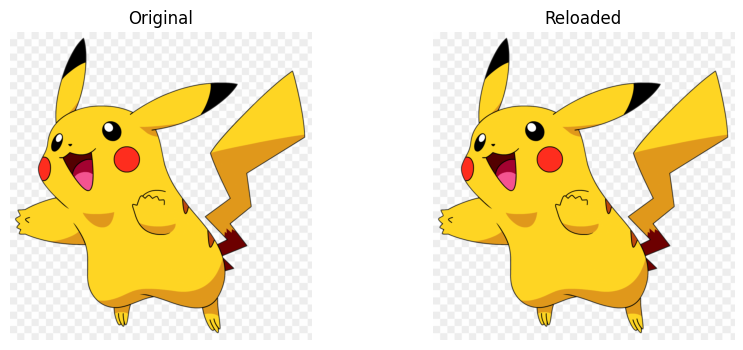

In [8]:
# TODO (Task 2.2): save and reload
out_path = "output_saved.png"

# OpenCV expects BGR when writing
bgr = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
cv2.imwrite(out_path, bgr)

reloaded_bgr = cv2.imread(out_path, cv2.IMREAD_COLOR)
reloaded_rgb = cv2.cvtColor(reloaded_bgr, cv2.COLOR_BGR2RGB)

print("Reloaded shape:", reloaded_rgb.shape, "| dtype:", reloaded_rgb.dtype)
show_side_by_side(img, reloaded_rgb, "Original", "Reloaded")


## 3) Grayscale and binary images

### Task 3.1 — Convert to grayscale
Create a grayscale version of the image using OpenCV. Display original vs grayscale.

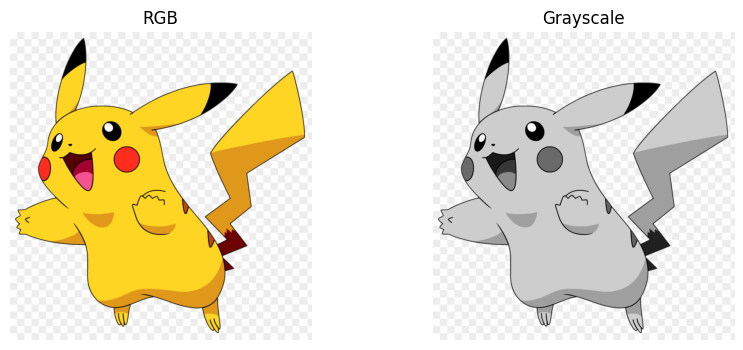

Gray shape: (859, 840) | dtype: uint8


In [9]:
# TODO (Task 3.1): grayscale
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
show_side_by_side(img, gray, "RGB", "Grayscale", cmap2="gray")
print("Gray shape:", gray.shape, "| dtype:", gray.dtype)


### Task 3.2 — Threshold to binary
1. Create a binary image using a manual threshold (e.g., 128).
2. Create a binary image using Otsu's method.
3. Compare results (1–2 sentences).

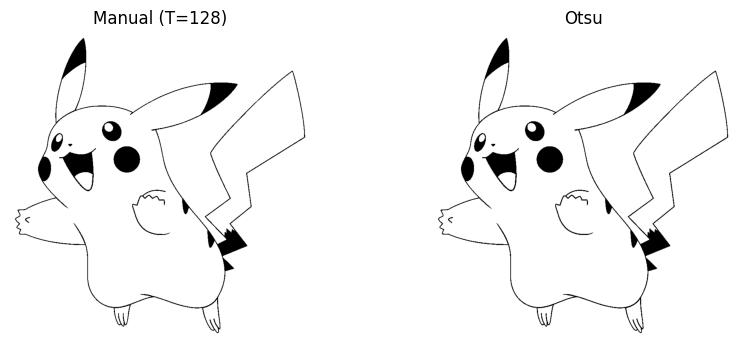

Otsu threshold chosen by OpenCV: 255


In [13]:
# TODO (Task 3.2): thresholding
th_manual = 128
_, binary_manual = cv2.threshold(gray, th_manual, 255, cv2.THRESH_BINARY)

_, binary_otsu = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

show_side_by_side(binary_manual, binary_otsu, f"Manual (T={th_manual})", "Otsu", cmap1="gray", cmap2="gray")
print("Otsu threshold chosen by OpenCV:", 255)


**Task 3.2 (Answer):**  
- Key Differences observed:

    Manual (T=128): Might appear too "harsh" or "faint" depending on your specific image's exposure.
    Otsu: Often handles shadows and varying lighting conditions better because it is data-driven rather than hard-coded.

## 4) Cropping (ROI)

### Task 4.1 — Crop a region of interest
1. Pick an ROI using array slicing: `img[y1:y2, x1:x2]`.
2. Display original and cropped ROI.

Tip: choose coordinates that capture a meaningful object/face.

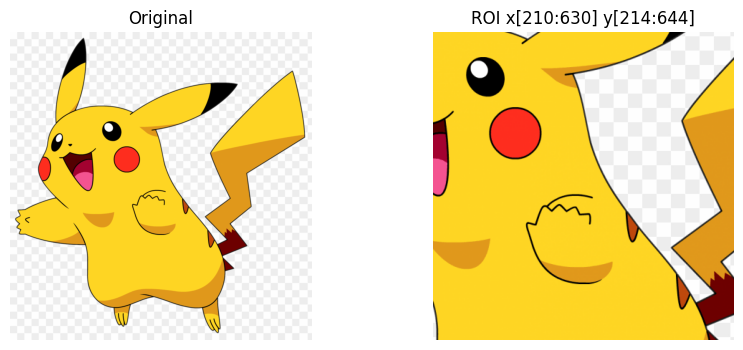

ROI shape: (430, 420, 3)


In [14]:
# TODO (Task 4.1): set ROI coordinates
h, w = img.shape[:2]
x1, y1 = int(0.25*w), int(0.25*h)
x2, y2 = int(0.75*w), int(0.75*h)

roi = img[y1:y2, x1:x2].copy()
show_side_by_side(img, roi, "Original", f"ROI x[{x1}:{x2}] y[{y1}:{y2}]")
print("ROI shape:", roi.shape)


### Task 4.2 — Explain coordinates
Explain why the slicing is `img[y, x]` (row-major) and not `img[x, y]`.

**Task 4.2 (Answer):**  
- Row-Major Ordering:
Python's numerical libraries use row-major indexing. In a matrix, you first locate the horizontal row you want to access, and then the column within that row. Since the y-coordinate (vertical) determines the row and the x-coordinate (horizontal) determines the column, the notation becomes [row, column], which maps directly to [y, x].
Memory Alignment:
This structure aligns with how data is stored in memory—row by row. When you slice img[y1:y2], you are selecting a contiguous block of memory representing full horizontal lines. If it were [x, y], the computer would have to jump across memory addresses to find each pixel in a column, which is significantly less efficient for processing.

## 5) Color spaces

### Task 5.1 — Convert RGB to HSV and visualize channels
1. Convert the image to HSV using OpenCV.
2. Display the H, S, and V channels as grayscale images.

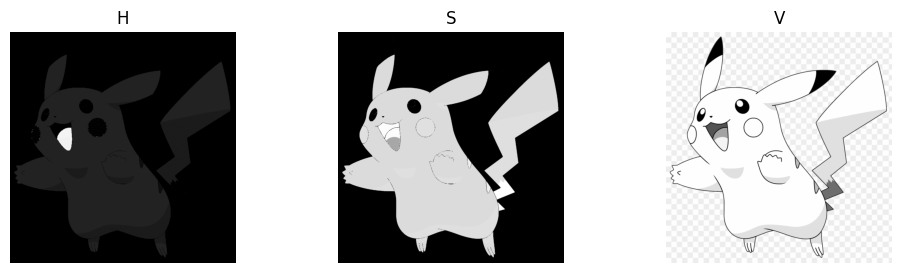

In [15]:
# TODO (Task 5.1): HSV conversion and channel display
hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
H, S, V = hsv[:,:,0], hsv[:,:,1], hsv[:,:,2]

plt.figure(figsize=(12,3))
for i, (ch, name) in enumerate([(H,"H"), (S,"S"), (V,"V")], start=1):
    plt.subplot(1,3,i); plt.imshow(ch, cmap="gray"); plt.title(name); plt.axis("off")
plt.show()


## 6) Lab 2 — Basic arithmetic operations on images

This section follows the Lab 2 handout (Basic arithmetic operations on images): subtraction, addition, multiplication, division.

Use your loaded image. Operations should be done safely on `uint8` images (0–255). OpenCV functions (`cv2.add`, `cv2.subtract`, etc.) saturate at 0/255 automatically.

### 6.1 Subtracting an intensity (darkening)


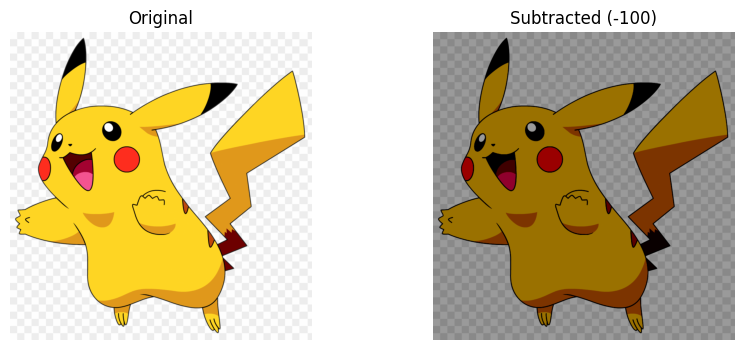

In [16]:
# Provided example (edit the constant and re-run)
sub_val = 100  # TODO: try 30, 100, 150
img_sub = cv2.subtract(img, sub_val)

show_side_by_side(img, img_sub, "Original", f"Subtracted (-{sub_val})")


**Task 6.1 (Answer):**
1. What happens when you increase `sub_val`?  
2. Why does the image get darker?  

1.As you increase sub_val, more pixels across the image hit the floor of 0 (pure black). Because OpenCV uses saturation arithmetic, any subtraction result that would normally be negative (e.g.,
) is automatically capped at 0. Consequently, large areas of the image will eventually become solid black "blobs" where detail is lost.
2.The image gets darker because you are reducing the intensity values of the RGB channels. In digital imaging, lower numerical values represent less light; by subtracting a constant from every pixel, you shift the entire distribution of the image toward 0, which the screen interprets as lower brightness.

### 6.2 Subtract from *red channel only*
Modify only the **R** channel (in RGB) by subtracting a constant. Keep other channels unchanged.

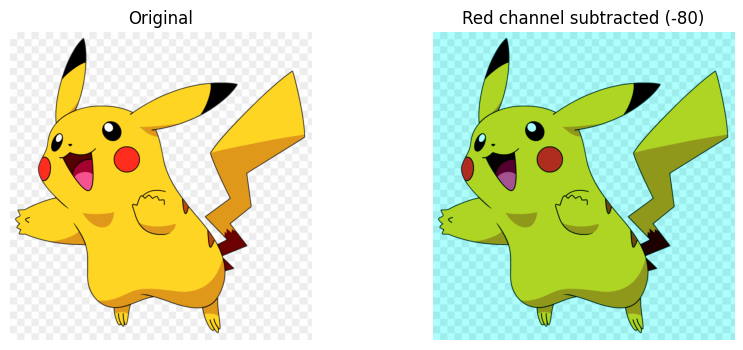

In [17]:
# TODO (Task 6.2): subtract from Red channel only
sub_val_r = 80

img_red_only = img.copy()
# RGB: channel 0=R, 1=G, 2=B
img_red_only[:,:,0] = cv2.subtract(img_red_only[:,:,0], sub_val_r)

show_side_by_side(img, img_red_only, "Original", f"Red channel subtracted (-{sub_val_r})")


### 6.3 Adding an intensity (brightening)

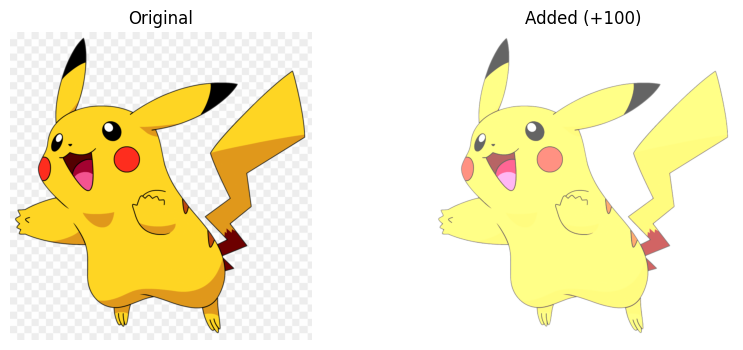

In [18]:
add_val = 100  # TODO: try 30, 100, 150
img_add = cv2.add(img, add_val)

show_side_by_side(img, img_add, "Original", f"Added (+{add_val})")


**Task 6.3 (Answer):**
1. What happens when you increase `add_val`?  
2. Why does the image get brighter?  
    1.As add_val increases, the image becomes progressively brighter until it begins to "wash out." Because cv2.add uses saturation arithmetic, any pixel value that exceeds 255 is capped at 255. As a result, the brighter areas of the image lose detail and turn into solid pure white patches.
    2.The image gets brighter because you are increasing the numerical intensity of the color channels. In the RGB model, higher values represent a higher emission of light; by adding a constant to every pixel, you are shifting the image's histogram toward the maximum limit (255), which the monitor displays as increased luminosity.

### 6.4 Add to *red channel only*

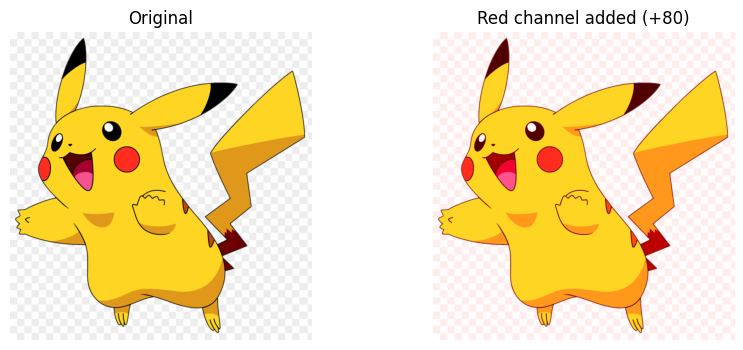

In [19]:
# TODO (Task 6.4): add to Red channel only
add_val_r = 80

img_red_only_add = img.copy()
img_red_only_add[:,:,0] = cv2.add(img_red_only_add[:,:,0], add_val_r)

show_side_by_side(img, img_red_only_add, "Original", f"Red channel added (+{add_val_r})")


### 6.5 Multiplying by a constant (contrast/brightness change)

Use `cv2.multiply` with a float factor. Convert to `float32` first, then clip back to `uint8`.

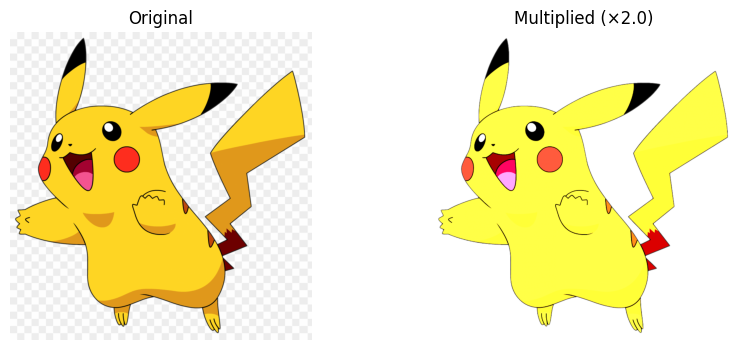

In [20]:
# TODO: try factors like 0.5, 1.2, 2.0
factor = 2.0

img_f = img.astype(np.float32)
img_mul = clip_uint8(img_f * factor)

show_side_by_side(img, img_mul, "Original", f"Multiplied (×{factor})")


**Task 6.5 (Answer):**
- Discuss the effect of multiplying by a factor > 1 vs < 1.  
- Factor > 1 (e.g., 1.2, 2.0): This increases the image brightness and contrast. By multiplying, the gap between dark and light pixels widens; however, many bright pixels will quickly hit the 255 ceiling (clipping), resulting in "blown-out" white areas where detail is lost.
    Factor < 1 (e.g., 0.5): This decreases the brightness and contrast. It compresses the range of pixel intensities toward 0, making the image appear darker and "flatter" as the difference between the brightest and darkest points is reduced.
Unlike addition, which shifts all pixels by the same amount, multiplication scales them proportionally. This means dark pixels stay relatively dark while bright pixels get much brighter, which is why multiplication is the fundamental operation behind digital gain and contrast adjustment.

### 6.6 Dividing by a constant

Division by a number > 1 tends to darken; division by < 1 tends to brighten (but can saturate).

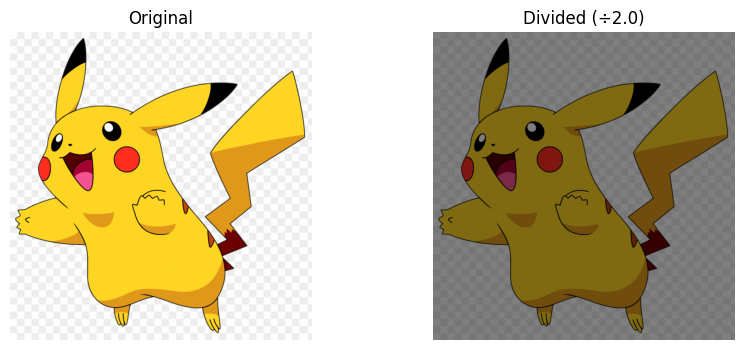

In [21]:
# TODO: try divisors like 2.0, 3.0, 0.5
divisor = 2.0

img_f = img.astype(np.float32)
img_div = clip_uint8(img_f / divisor)

show_side_by_side(img, img_div, "Original", f"Divided (÷{divisor})")


**Task 6.6 (Answer):**
- Compare dividing by a number greater than 1 versus less than 1.  
- Divisor > 1 (e.g., 2.0, 3.0): This causes the image to darken. Every pixel intensity is reduced proportionally; for example, a divisor of 2.0 cuts all brightness values in half. This compresses the histogram toward 0, making the image appear dimmer while preserving the relative relationship between colors.
Divisor < 1 (e.g., 0.5): This causes the image to brighten. Mathematically, dividing by a fraction (like 0.5) is the same as multiplying by its reciprocal (like 2.0). This stretches the intensity values upward, which can lead to significant saturation (clipping at 255) in already bright areas.

## 7) Mini-report (required)

Write a short report (150–250 words) describing:
- what you learned
- which operation(s) were most useful and why
- any issues you encountered (file paths, color order, dtype, etc.)

**Report:**  
- In this lab, I successfully configured a Python-based image processing environment on
Xubuntu 24.04 using VS Code and Jupyter. I learned how to manipulate image data as NumPy arrays, moving beyond simple viewing to direct pixel manipulation using both manual slicing and OpenCV functions.
The most useful operations were Otsu’s Thresholding and Arithmetic Scaling (multiplication/division). While manual thresholding requires constant "magic number" tuning, Otsu’s method proved superior by automatically adapting to the image's histogram. Similarly, I found that multiplicative scaling is more effective for adjusting brightness than simple addition because it preserves the relative contrast between pixels rather than just shifting the entire intensity range toward white.
I encountered several common "gotchas" during setup:
    Environment Management: I initially hit the PEP 668 block on Xubuntu but resolved it by creating a dedicated virtual environment.
    Color Ordering: I realized that OpenCV defaults to BGR, requiring a conversion to RGB for correct visualization in Matplotlib/Jupyter.
    Data Types: I learned the importance of converting images to float32 before division or multiplication to avoid integer wrap-around errors, followed by using np.clip to return safely to the uint8 format.
Overall, this lab provided a solid foundation in the "math" behind digital vision.

## Submission checklist
Include in your submission:
1. This completed notebook (`.ipynb`)
2. Screenshots/outputs of: original RGB, grayscale, binary, cropping ROI channels, and arithmetic operations
3. Your answers in the markdown answer blocks
